<a href="https://colab.research.google.com/github/SallyPeter/gomycodeDSbootcamp/blob/main/ML/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is took place from 2023-07-05 to 2023-09-30. Fore more information click here.


**Checkpoint problem:** Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.


**Dataset description :** This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

**Instructions**

- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Select your target variable and the features
- Split your dataset to training and test sets
- Based on your data exploration phase select a ML regression algorithm and train it on the training set
- Assess your model performance on the test set using relevant evaluation metrics
- Discuss with your cohort alternative ways to improve your model performance

In [51]:
# !pip install ydata_profiling;

In [52]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [53]:
# Import you data and perform basic data exploration phase
data = pd.read_csv("5G_energy_consumption_dataset.csv")
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [54]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [55]:
# Create a pandas profiling reports to gain insights into the dataset

profile = ProfileReport(data, title='5G Data')

# Display the report
profile.to_notebook_iframe() # Literally displays the result as an output sometimes

# Or generate an HTML report
profile.to_file("5G Data") # Saves the generated report as a html file which you can open on a browser outside the coding environment


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
# Handle Missing and corrupted values

# As seen in the profilling report above, there are no missing values. to be double sure we check again to confirm

data.isna().sum()

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


In [57]:
# Remove duplicates, if they exist
# From the profiling report, there are no duplicates. To reconfirm, we check again.

data.duplicated().sum()

0

In [58]:
# Handle outliers, if they exist

data.describe(include='all')

,Time,BS,Energy,load,ESMODE,TXpower
count,92629,92629,92629.000000,92629.000000,92629.000000,92629.000000
unique,168,923,NaN,NaN,NaN,NaN
top,20230102 230000,B_583,NaN,NaN,NaN,NaN
freq,766,130,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.138997,0.244705,0.081361,6.765427
std,NaN,NaN,13.934645,0.234677,0.382317,0.309929
min,NaN,NaN,0.747384,0.000000,0.000000,5.381166
25%,NaN,NaN,18.236173,0.057370,0.000000,6.427504
50%,NaN,NaN,24.065770,0.165550,0.000000,6.875934
75%,NaN,NaN,35.724963,0.363766,0.000000,6.875934


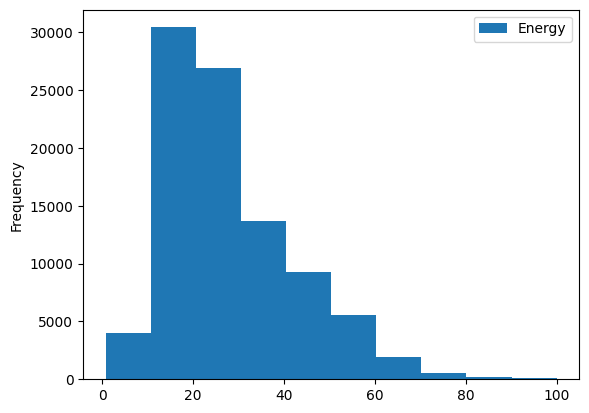

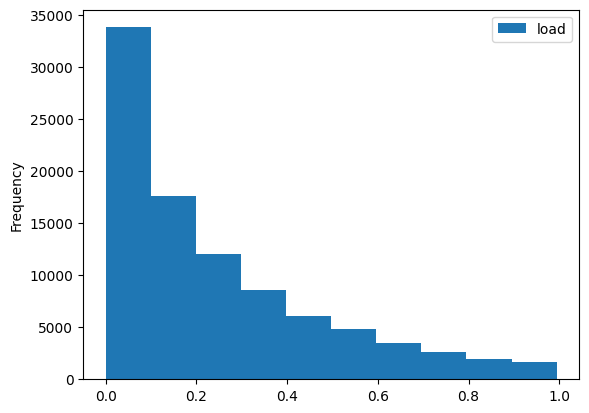

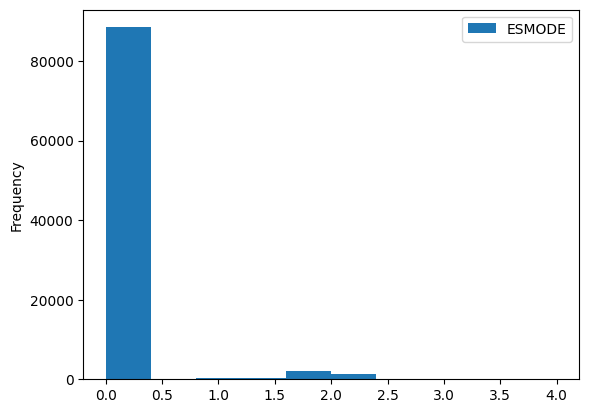

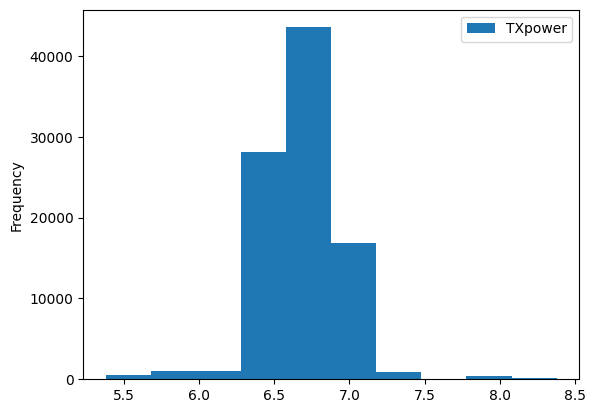

In [59]:
for each in ['Energy',	'load',	'ESMODE', 'TXpower']:
  data.plot.hist(column=[each])


<ipython-input-60-16b8be6f6211>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ESMODE'])


<Axes: xlabel='ESMODE', ylabel='Density'>

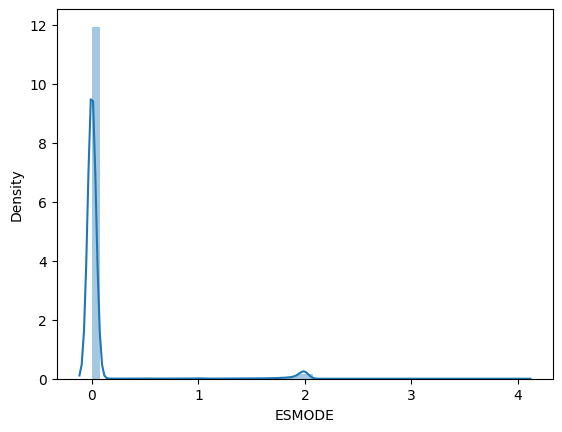

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data['ESMODE'])

In [61]:
data.shape

(92629, 6)

In [62]:
data['ESMODE'].value_counts()

,count
ESMODE,
0.000000,87475
2.000000,1299
1.999722,226
0.002500,134
0.000556,122
...,...
0.378611,1
1.805833,1
1.467778,1


In [63]:
data[data.ESMODE > 2.0]

,Time,BS,Energy,load,ESMODE,TXpower
81593,20230101 020000,B_740,10.014948,0.014760,2.181944,6.875934
81594,20230101 030000,B_740,9.267564,0.013120,2.182500,6.875934
81595,20230101 040000,B_740,5.829596,0.009990,3.053333,6.875934
81596,20230101 060000,B_740,19.581465,0.012165,3.262500,6.875934
81612,20230102 040000,B_740,11.958146,0.009470,2.798056,6.875934
81613,20230102 060000,B_740,21.674141,0.019965,2.594444,6.875934
81628,20230103 020000,B_740,5.680120,0.013585,2.570278,6.875934
81629,20230103 030000,B_740,5.231689,0.009090,3.843889,6.875934
81630,20230103 040000,B_740,5.680120,0.008760,3.893889,6.875934
81631,20230103 060000,B_740,17.638266,0.008355,3.955556,6.875934


This further confirms the absence of outliers in the dataset. The ESMODE values would be used as is since the values are mostly 0

In [64]:
data.BS.nunique()

923

In [65]:
# Encode categorical features
le = LabelEncoder()
data['BS'] = le.fit_transform(data['BS'])

data.head()



,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,0,56.053812,0.175436,0.0,7.101719


In [66]:
data.BS.nunique()

923

In [69]:
data[["Date", "Hour"]] = data['Time'].str.split(" ", expand=True)
data["Year"] = data['Date'].str[:4].astype(int)
data['Month'] = data['Date'].str[5:6].astype(int)
data["Day"] = data['Date'].str[-2:].astype(int)

data['Hour'] = data["Hour"].str[:-4].astype(int)

data.drop(["Time", "Date"], axis = 1, inplace=True)

In [70]:
data.head()

,BS,Energy,load,ESMODE,TXpower,Hour,Year,Month,Day
0,0,64.275037,0.487936,0.0,7.101719,1,2023,1,1
1,0,55.904335,0.344468,0.0,7.101719,2,2023,1,1
2,0,57.698057,0.193766,0.0,7.101719,3,2023,1,1
3,0,55.156951,0.222383,0.0,7.101719,4,2023,1,1
4,0,56.053812,0.175436,0.0,7.101719,5,2023,1,1


In [71]:
# data["Hour"].str[:-4].astype(int).unique

data["Hour"].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 14, 15, 16, 17, 18, 19, 20, 21,
       22,  0,  6, 11, 12, 13, 23])

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BS       92629 non-null  int64  
 1   Energy   92629 non-null  float64
 2   load     92629 non-null  float64
 3   ESMODE   92629 non-null  float64
 4   TXpower  92629 non-null  float64
 5   Hour     92629 non-null  int64  
 6   Year     92629 non-null  int64  
 7   Month    92629 non-null  int64  
 8   Day      92629 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 6.4 MB


In [73]:
# Select your target variable and the features
y = data["Energy"]
x = data.drop("Energy", axis = 1)

In [74]:
# Split your dataset to training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [75]:
# Based on your data exploration phase select a ML regression algorithm and train it on the training set
lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [76]:
# Assess your model performance on the test set using relevant evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  85.02889505332236
MAE:  6.837288783497325
R2:  0.5569370442284354


Would normalizing the values of load, TXPower, BS and Day have an effect?


In [77]:
# apply normalization techniques
x_scaled = x.copy()
for column in x_scaled.columns:
    x_scaled[column] = (x_scaled[column] - x_scaled[column].min()) / (x_scaled[column].max() - x_scaled[column].min())


x_scaled.head()

,BS,load,ESMODE,TXpower,Hour,Year,Month,Day
0,0.0,0.490902,0.0,0.574634,0.043478,NaN,NaN,0.0
1,0.0,0.346562,0.0,0.574634,0.086957,NaN,NaN,0.0
2,0.0,0.194944,0.0,0.574634,0.130435,NaN,NaN,0.0
3,0.0,0.223735,0.0,0.574634,0.173913,NaN,NaN,0.0
4,0.0,0.176503,0.0,0.574634,0.217391,NaN,NaN,0.0


Dropping Year and Month as they are the same and may have little to no effect on the model

In [78]:
x_scaled.drop(["Year", "Month"], axis=1, inplace=True)

x_scaled.head()

,BS,load,ESMODE,TXpower,Hour,Day
0,0.0,0.490902,0.0,0.574634,0.043478,0.0
1,0.0,0.346562,0.0,0.574634,0.086957,0.0
2,0.0,0.194944,0.0,0.574634,0.130435,0.0
3,0.0,0.223735,0.0,0.574634,0.173913,0.0
4,0.0,0.176503,0.0,0.574634,0.217391,0.0


Perform the training and prediction again

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=20)

lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  85.02889505332227
MAE:  6.837288783497311
R2:  0.5569370442284358


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.1, random_state=20)

lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [86]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  82.58900997017427
MAE:  6.786576820452393
R2:  0.5537796186528918


In [ ]:
# Discuss with your cohort alternative ways to improve your model performance


# -- More data
# -- Better models maybe
